# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
#1. CRIM: per capita crime rate by town 
#2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
#3. INDUS: proportion of non-retail business acres per town 
#4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
#5. NOX: nitric oxides concentration (parts per 10 million) 1https://archive.ics.uci.edu/ml/datasets/Housing 123 20.2. Load the Dataset 124 
#6. RM: average number of rooms per dwelling 
#7. AGE: proportion of owner-occupied units built prior to 1940 
#8. DIS: weighted distances to ﬁve Boston employment centers 
#9. RAD: index of accessibility to radial highways 
#10. TAX: full-value property-tax rate per $10,000 
#11. PTRATIO: pupil-teacher ratio by town 
#12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
#13. LSTAT: % lower status of the population 
#14. MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.

In [2]:
# Your code here
import pandas as pd
import numpy as np

data = pd.read_csv('../data/boston_data.csv')
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


In [3]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
missing_values = data[data.isnull().any(axis=1) == True]
missing_values # for missing values
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
new_boston = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
new_boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data = data[~((data[data.columns.difference(['chas'])]  < (Q1 - 1.5 * IQR)) | (data[data.columns.difference(['chas'])] > (Q3 + 1.5 * IQR))).any(axis=1)]
data['crim'].count() # number of rows without outliers

246

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

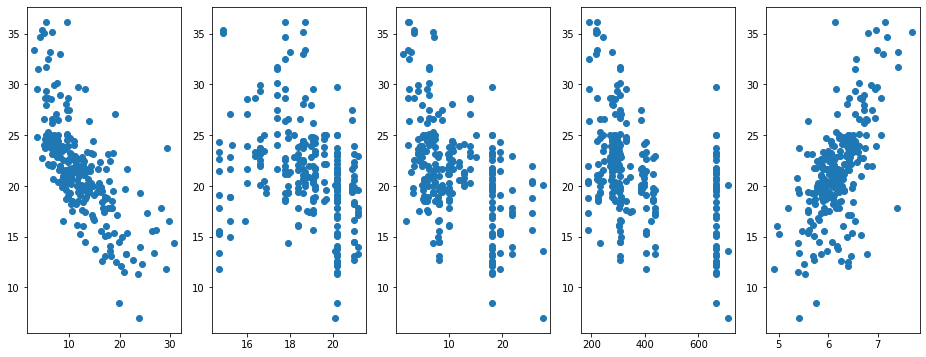

In [7]:
# Your plots here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(1,5, figsize=(16,6))
ax[0].scatter(data['lstat'], data['medv'])
ax[1].scatter(data['ptratio'], data['medv'])
ax[2].scatter(data['indus'], data['medv'])
ax[3].scatter(data['tax'], data['medv'])
ax[4].scatter(data['rm'], data['medv'])
plt.show()

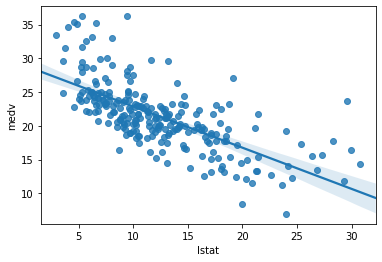

In [8]:
ax1 = sns.regplot(x="lstat", y="medv", data=data) # very high correleation, most values are near regression line

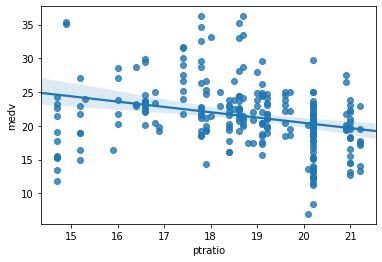

In [9]:
ax2 = sns.regplot(x="ptratio", y="medv", data=data) # big dispersion, difficult to analyse it.

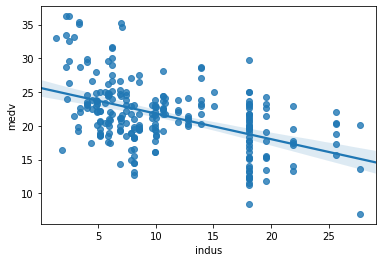

In [10]:
ax3 = sns.regplot(x="indus", y="medv", data=data) # high correlation and we understand the price is really depends on proportion types of houses

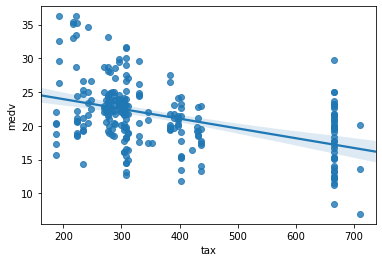

In [11]:
ax4 = sns.regplot(x="tax", y="medv", data=data) # sure price depends on taxes. We have lines in our plot, because of different interest rates

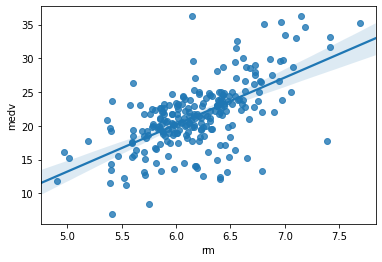

In [12]:
ax5 = sns.regplot(x="rm", y="medv", data=data) # the more number of rooms, the more price

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# Your response here
# there are different relationships between medv and these 5 columns. Only ptratio was unexpected for me

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

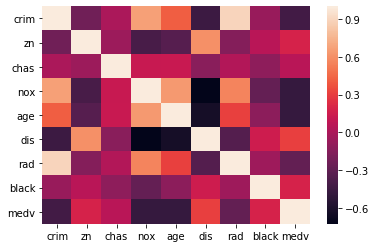

In [14]:
# Your response here
sns.heatmap(data[['crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'black', 'medv']].corr())

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [15]:
# Your code here
data['medv'].describe()

count    246.000000
mean      21.492276
std        4.986461
min        7.000000
25%       18.825000
50%       21.400000
75%       23.900000
max       36.200000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [16]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [17]:
# Your code here
from sklearn.model_selection import train_test_split

y = data['medv'] 
x = data.drop(["medv"], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [18]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

data_2 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
data_4 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
data_6 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
data_8 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
data_10 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Now, plot the score for each tree on the training set and on the testing set.

In [19]:
# Produce a plot with the score for the testing and training for the different max depths
print('max_depth = 2: ', performance_metric(y_test, data_2.predict(X_test)))
print('max_depth = 4: ', performance_metric(y_test, data_4.predict(X_test)))
print('max_depth = 6: ', performance_metric(y_test, data_6.predict(X_test)))
print('max_depth = 8: ', performance_metric(y_test, data_8.predict(X_test)))
print('max_depth = 10: ', performance_metric(y_test, data_10.predict(X_test)))

max_depth = 2:  0.5369531794557274
max_depth = 4:  0.6443390406949723
max_depth = 6:  0.6878981601913032
max_depth = 8:  0.754406173945325
max_depth = 10:  0.7555838556419918


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [20]:
# Your response here
#the deeper forest, the higher accurancy

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [21]:
# Your response here
# When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? - from high bias
# How about when the model is trained with a maximum depth of 10?  - from high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [22]:
# Your response here
#max_depth = 8 is optimaze the model. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [23]:
# Your response here
#How relevant today is data that was collected from 1978? No, I guess this data aren't relevant
# Are the features present in the data sufficient to describe a home? I think we need more features
# Is the model robust enough to make consistent predictions? Yes, it's enough to make predictions
#Would data collected in an urban city like Boston be applicable in a rural city? No. For each type of city models are different